# Welcome to ColumnWithWaterfall from Clean Business Chart

### Why Clean Business Chart?

As a data analyst, I'm using Python for more complex analysis. And right there, where I have some findings, I need to do a lot of work to get a good business chart out of matplotlib or seaborn (both are visualisation packages in the Python world).

Next to that, a couple of years ago I was introduced into __[IBCS](https://www.ibcs.com)__ (International Business Communication Standards). They have great guidelines on making charts that stand on their own.

I found that there were no IBCS-inspired packages for Python and that's where my intrinsically motivation for business data visualisations and my software engineering knowledge came together.

So, you are looking at the second release of Clean Business Chart. I am planning to add functionality to it, but I don't have a strict time schedule for it. I have other hobbies like my family, music, photography, learning and more. If you are a Python developer and wants to contribute to this package, feel free. This Open Source package has the __[MIT License](https://en.wikipedia.org/wiki/MIT_License)__, which means you can do almost anything with this package or parts of it. Use it, change it, sell it, integrate it in your own product and so on. More details in the MIT-license information.

Releases:
- First release contains the ColumnWithWaterfall for visualizing the months of the year in the chart
- Second release contains the BarWithWaterfall for visualizing over a category-of-interest in the chart

Thanks for reading, and now back to business!<br>

Marcel Wuijtenburg<br>
marcelw1323(at)gmail.com

Follow the public __[LinkedIn-group about Clean Business Chart](https://www.linkedin.com/groups/12827987/)__ for the most recent information.

### IBCS-inspired, what means that?

IBCS-inspired means that this package follows most of the IBCS-rules (IBCS is Creative Commons (https://www.ibcs.com/terms-of-use/)). In the provided charts you'll see the following:
* Visualisation of the main bars:
  * Solid. These are the actual figures. You have a dark grey (almost black) color for the actuals of the reporting year (AC) and a lighter grey for actuals of a previous year (PY).
  * Outlined. These are the planned (PL) or budget figures.
  * Hatched. These are the forecast (FC) figures.
By the way: "Solid, Outlined, Hatched" is a good book about IBCS. The first example underneath is inspired of the chart on page 193.

* Colors:
  * Green: Only used to express a good variance from a business perspective
  * Red: Only used to express a bad variance from a business perspective.
  * Blue: Only used to highlight things in the charts.


### Starting with Clean Business Chart

To make a Clean Business Chart you need to follow these 4 steps:
1. Install the package
1. Import the package
1. Make the dataset
1. Show the business chart

#### 1. Install the package

You need to install the Clean Business Chart package only once. It has a dependency with the matplotlib-package and the pandas-package that will be resolved automatically.

In [ ]:
pip install clean_business_chart

#### 2. Import the package

Everytime you want to use the package, you need to import the package only once per Jupyter-notebook or other file

In [ ]:
import clean_business_chart as cbc   # cbc is an abbreviation making it easier to make a call to the parts of the package

#### 3. Make the dataset

Clean Business Chart supports three ways of making the dataset. The dataset below is the easiest one. And you see that you can fill a title which makes the business chart stand on its own.

In [ ]:
# Declare an empty dictionary called 'title_dict' to store title-values
title_dict = dict()

# Fill the title-values
title_dict['Reporting_unit']   = 'Engineering Corporation'           # Name of the company or the department
title_dict['Business_measure'] = 'Net sales'                         # Name of the business measure
title_dict['Unit']             = 'USD'                               # Unit: USD or EUR (monetary) or # (count)
title_dict['Time']             = '2022'                              # More specific information about the time selection

# Fill the data to be visualized in this dataset
dataset = {'PY': [14, 16, 14, 17, 19, 17, 19, 22, 16, 17, 16, 22],   # Previous Year information for 12 months
           'PL': [11, 10, 10, 10, 10, 10, 15, 14, 15, 15, 15, 19],   # Plan information for 12 months
           'AC': [15, 13, 16, 7, 5, 6, 17, 11],                      # Actual information for up to 12 months
           'FC': [0, 0, 0, 0, 0, 0, 0, 0, 26, 22, 13, 29],           # Forecast information to go after the actual months
           'Year': 2022}                                             # Year of the main information (Plan/Actual/Forecast)

#### 4. Show the business chart

Call the ColumnWithWaterfall with the parameters to show the business chart

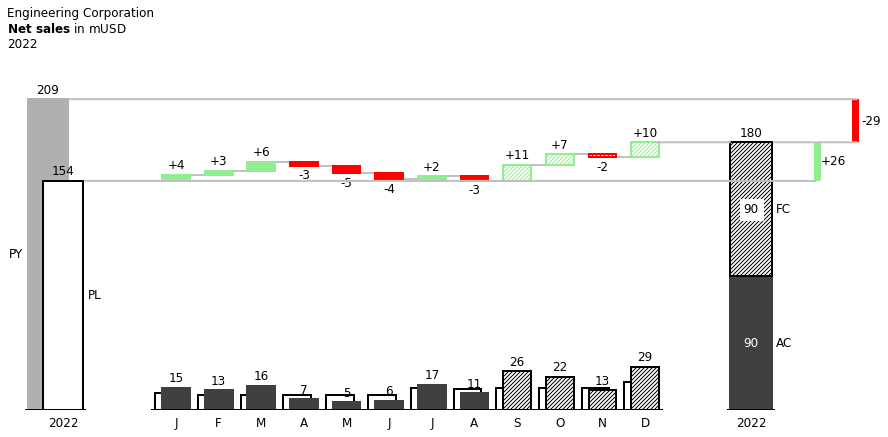

In [ ]:
chart1 = cbc.ColumnWithWaterfall(data=dataset,                        # Assign the dataset to the parameter data 
                                preferred_base_scenario='PL',        # Which delta chart do you wish to see? PL or PY?
                                title=title_dict,                    # Assign the title_dict to the parameter title
                                force_zero_decimals=True,            # Make the business chart more clean with zero decimals
                                multiplier='m')                      # Multiplier will be used in the title and will also
                                                                     #      be used with optimizations

Ok, that's it! You made your first ColumnWithWaterfall chart with Clean Business Chart. Feel free to change the entries in the title_dict and the values in the dataset.<br>

You can use normal values to visualise, for example '42325873' for a value of approx 42.3 million. If you do this, make the multiplier = "1". You can read more about this in the parameter section below.

### Parameter

 All possible parameters are described below. Most parameters have default values.

**data**:
* A dictionary with minimal PL and AC or PY and AC detailinformation, like the one you saw above. This is probably the most easy for manual maintenance of values.
* A string with CSV-values. If you have a file with CSV-values, you can copy and paste it into a Python string.
* A pandas DataFrame. When you are familiar with pandas DataFrames, this is the way to go.
* A list of lists is also supported. With this formula, you convert a Pandas DataFrame to a list of lists:<br><code>[df.columns.tolist()] + df.values.tolist()</code><br>This is more for backwards compatibility with the first release of the package.

**positive_is_good**:<br>
* True: Makes positive bars on a variance chart visual with a good color (green) and negative bars with a bad color (red). Use this for example with 'Net sales'.
* False: Makes positive bars on a variance chart visual with a bad color (red) and negative bars with a good color (green). Use this for example with 'Costs'.

Default: True (good color).

**preferred_base_scenario**:
* PL uses Planinfo as the base scenario in the main chart.
* PY uses Previous Year als the base scenario in the main chart

Default: PL (Planinfo)

**title**:<br>A dictionary with text values to construct a title. No part of the title is mandatory, except when 'Business_measure' is filled, the 'Unit' is expected to be filled too.


* <code>title['Reporting_unit'] = 'Global Corporation'     </code># This is the name of the company or the project or business unit, added with a selection. For example 'ACME inc., Florida and California'
* <code>title['Business_measure'] = 'Net profit'           </code># This is the name of the metric. Can also be a ratio. For example: 'Net profit' or 'Cost per headcount'
* <code>title['Unit'] = 'CHF'                              </code># This is the name of the unit. For example: 'USD', 'EUR', '#', '%'.
* <code>title['Time'] = '2022'                             </code># This is the description of the time, scenario's and variances. For example: '2022 AC, PL, FC, PL%'

Default: None (no title)

**measure**:<br>I haven't found a use case for this kind of chart with ratio's, but this parameter will be in other charts as well.
* True -> measure
* False -> ratio

Default: True (measure)

**multiplier**:<br>One character with the multiplier ('1', 'k', 'm', 'b'). This multiplier triggers the optimizer to make the best possible chart with only 3 significant numbers for detail information.
* '1': one
* 'k': 1000
* 'm': 1000000
* 'b': 1000000000

Default: '1' (one)

**filename**:<br>String with filename and path to export the chart to, including extention. Only tested with a .png-extention.

Default: None (no export of the chart to a file)

**force_pl_is_zero**:
* False: If PL has all zero-values then PL can be ignored
* True: If PL has all zero-valuess then PL can not be ignored and these zero-values are really the plan-information

Default: False (PL can be ignored when all zeros)

**force_zero_decimals**:
* True, we use integers for output. This gives a more clean chart, but can lack some detail in some cases
* False, we use 3 numbers for detail info. This can go up to 2 decimals.

Default: False (don't force zero decimals)

**force_max_one_decimals**:
* True, the maximum of decimals used is one. Know that <code>force_zero_decimals</code> has a higher priority than force_max_one_decimals.
* False, we don't force max one decimals.

Default: False (don't force max one decimals)

**translate_headers:**<br>
Dictionary where you can translate field headers, for example {'Orderdate':'Date', 'Revenue':'AC'}. This can be easy so you don't need it to translate it by yourself before calling the function. It can also be easy if you use this function inside for example "Power BI" where you don't want to change the column names inside of Power BI.

Default: None (no translation of headers will occur)

### String with CSV-values

In Python, you can have a string starting with 3 quotation marks and ending with 3 quotation marks. You can paste the content of a CSV-file in this string. The first row contain the headers. We need Year, Month and PL or PY and AC or FC. If you have two years of data, the newest year is the actual and the actual of the previous year will be the previous year values for this actual year.

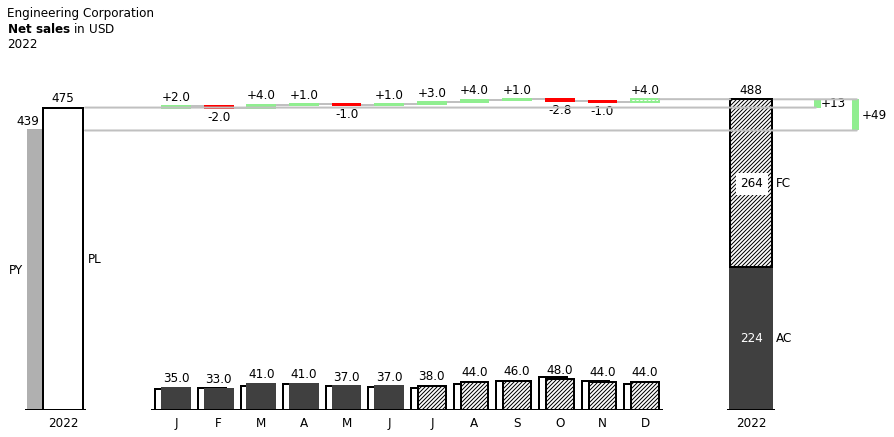

In [ ]:
dataset2 = """
Year,Month,PL,AC,FC,PY
2021,1,0,32,0,0
2021,5,0,41,0,0
2021,6,0,37,0,0
2021,7,0,33,0,0
2021,2,0,38,0,0
2021,3,0,29,0,0
2021,4,0,35,0,0
2021,8,0,38,0,0
2021,9,0,42,0,0
2021,10,0,44,0,0
2021,11,0,39,0,0
2021,12,24,31,48,0
2020,10,0,44,0,0
2020,11,0,39,0,0
2020,12,0,31,0,0
2022,1,33,35,0,32
2022,2,35,33,0,38
2022,3,37,41,0,29
2022,4,40,41,0,35
2022,5,38,37,0,41
2022,6,36,37,0,37
2022,7,35,0,38,33
2022,8,40,0,44,38
2022,9,45.0328,0,46,42
2022,10,50.8000,0,48,44
2022,11,45,0,44,39
2022,12,40,0,44,31
"""
chart2 = cbc.ColumnWithWaterfall(data=dataset2, preferred_base_scenario='PL', title=title_dict)

### Support for pandas

Pandas is a very powerfull package for Python. When you are number crushing with datasets, you've probably used pandas. 

You'll see some example code below.

In [ ]:
# get csv data
df = pd.read_csv('datafile.csv')

# or get Excel data
df = pd.read_excel('datafile.xlsx')

# other commands to group by Year and Month
# .....

# Make the DataFrame as small a possible with Date or Year, Month and preferably AC, PL, FC, PY.
# Also make the column names according to this
# df.columns = ['Date', 'Year', 'Month', 'AC', 'FC', 'PL', 'PY']
# uncomment the line above. The order of AC, FC, PL or PY can be different

chart3 = cbc.ColumnWithWaterfall(data=df, preferred_base_scenario='PL', title=title_dict)

### Version and author check

In [ ]:
# check for version and author of the Clean Business Chart package
print(cbc.__version__)
print(cbc.__author__)